# 1. Importing Libararies that will be used in the quality quantification

In [1]:
!pip install pillow
!pip install dippykit
!!pip install scikit-image==0.15.0
!pip install SSIM_PIL
import matplotlib.pyplot as plt
import dippykit as dip
import numpy as np  # creating numpy arrays
from skimage.io import imread  # reading images
from skimage.transform import resize  # resizing images
from skimage import io, color,data
from skimage.io import imread_collection
import os 
import cv2
from skimage.color import rgb2gray
import pandas as pd
from PIL import Image, ImageFilter, ImageOps
import skimage.data, skimage.measure
from SSIM_PIL import compare_ssim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from keras.models import load_model
from google.colab import files
import cv2,os,h5py
import scipy.io

     |████████████████████████████████| 52 kB 824 kB/s 
  Created wheel for dippykit: filename=dippykit-3.0.0-py3-none-any.whl size=59018 sha256=f5436b9ede59ebe2a17f09b20789f6d032c19a1df6df36d432d28d65d26d8c63
  Stored in directory: /root/.cache/pip/wheels/c4/68/d4/dfd4af865478063c70099045d44b7e2a50aaae72ad82984e7a
Successfully built dippykit


# 2. Loading of the pristine dataset, this dataset contains images of high quality


In [2]:
!wget http://live.ece.utexas.edu/research/quality/pristinedata.zip
!unzip \*.zip
!ls

--2021-12-21 09:19:37--  http://live.ece.utexas.edu/research/quality/pristinedata.zip
Resolving live.ece.utexas.edu (live.ece.utexas.edu)... 128.83.21.174
Connecting to live.ece.utexas.edu (live.ece.utexas.edu)|128.83.21.174|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61540353 (59M) [application/zip]
Saving to: ‘pristinedata.zip’

pristinedata.zip    100%[===================>]  58.69M  88.7MB/s    in 0.7s    

2021-12-21 09:19:38 (88.7 MB/s) - ‘pristinedata.zip’ saved [61540353/61540353]

Archive:  pristinedata.zip
  inflating: pristine/img1.jpg       
  inflating: pristine/img10.jpg      
  inflating: pristine/img103.bmp     
  inflating: pristine/img105.bmp     
  inflating: pristine/img11.jpg      
  inflating: pristine/img112.bmp     
  inflating: pristine/img115.bmp     
  inflating: pristine/img12.jpg      
  inflating: pristine/img124.bmp     
  inflating: pristine/img13.jpg      
  inflating: pristine/img130.bmp     
  inflating: pristine/img134.bmp

# 3. Creating vectors to store the SSIM scores between the original dataset and the noisy versions

In [3]:
SSIM_value75=np.zeros([1,125])
SSIM_value50=np.zeros([1,125])
SSIM_value25=np.zeros([1,125])
SSIM_valueBlur=np.zeros([1,125])
SSIM_valueBoxBlur1=np.zeros([1,125])
SSIM_valueBoxBlur3=np.zeros([1,125])
SSIM_valueBoxBlur5=np.zeros([1,125])
SSIM_valueBoxBlur7=np.zeros([1,125])
SSIM_valueGaussianBlur5=np.zeros([1,125])
SSIM_valueGaussianBlur7=np.zeros([1,125])

# 4. Define functions to:

1.   Resize the dataset images' dimensions 
2.   convert the images to gray



In [4]:
def data_resize(filepath,u=321,v=321):
    img = dip.imread(filepath)
    img = dip.resize(img, dsize=(u,v),interpolation=cv2.INTER_AREA)
    img=dip.rgb2gray(img)
    return img
def data_resize2(img,u=321,v=321):
    img = img.resize([u,v])
    return img
def nothing(idx):
  img=cv2.imread(idx)
  img = np.array(img, dtype=np.float32)
  return img

# 5. Create 2 files to store:

# 1.   Degraded images
# 2.   Distortion maps



In [5]:
!mkdir noisy_data
!mkdir error_maps

# 6. For each image in the data set, create 10 different types of noise and store them in noisy_data, those noise are:
1.   Jpeg compression
2.   Guassian Blurring
3.   Box Blurring
4.   Blurring
# then compute the error maps and SSIM scores, save error map in error_map





In [6]:
path = "/content/pristine"
Copy_to_path="/content/noisy_data/"
open_path="/content/noisy_data"
Copy_to_path2="/content/error_maps/"
i=0
for filename in sorted(os.listdir(path)):
  img = Image.open(os.path.join(path, filename)) # images are color images
  print(type(img))
  img = data_resize2(img)
  file=os.path.splitext(filename)[0]
  root=os.path.splitext(filename)[1]
  img.save(Copy_to_path+'75'+filename+'.jpeg',quality=75)
  image=Image.open(os.path.join(open_path,'75'+filename+'.jpeg'))
  [SSIM_value75[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EM75'+filename+'.jpeg',SSTM_Emap)
  
  img.save(Copy_to_path+'50'+filename+'.jpeg',quality=50)
  image=Image.open(os.path.join(open_path,'50'+filename+'.jpeg'))
  [SSIM_value50[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EM50'+filename+'.jpeg',SSTM_Emap)
  
  img.save(Copy_to_path+'25'+filename+'.jpeg',quality=25)
  image=Image.open(os.path.join(open_path,'25'+filename+'.jpeg'))
  [SSIM_value25[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EM25'+filename+'.jpeg',SSTM_Emap)
  
  img2 = img.filter(ImageFilter.BLUR)
  img2.save(Copy_to_path+'Blur'+file+root)
  image=Image.open(os.path.join(open_path,'Blur'+file+root))
  [SSIM_valueBlur[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EMBlur'+file+root,SSTM_Emap)
 
  img1 = img.filter(ImageFilter.BoxBlur(1))
  img1.save(Copy_to_path+'BoxBlur1'+file+root)
  image=Image.open(os.path.join(open_path,'BoxBlur1'+file+root))
  [SSIM_valueBoxBlur1[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EMBoxBlur1'+file+root,SSTM_Emap) 
 
  img3 = img.filter(ImageFilter.BoxBlur(3))
  img3.save(Copy_to_path+'BoxBlur3'+file+root)
  image=Image.open(os.path.join(open_path,'BoxBlur3'+file+root))
  [SSIM_valueBoxBlur3[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EMBoxBlur3'+file+root,SSTM_Emap)

  img5 = img.filter(ImageFilter.BoxBlur(5))
  img5.save(Copy_to_path+'BoxBlur5'+file+root)
  image=Image.open(os.path.join(open_path,'BoxBlur5'+file+root))
  [SSIM_valueBoxBlur5[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EMBBoxBlur5'+file+root,SSTM_Emap)

  img7 = img.filter(ImageFilter.BoxBlur(7))
  img7.save(Copy_to_path+'BoxBlur7'+file+root)
  image=Image.open(os.path.join(open_path,'BoxBlur7'+file+root))
  [SSIM_valueBoxBlur7[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EMBoxBlur7'+file+root,SSTM_Emap)
  
  imgg5 = img.filter(ImageFilter.GaussianBlur(5)) 
  imgg5.save(Copy_to_path+'GaussianBlur5'+file+root)
  image=Image.open(os.path.join(open_path,'GaussianBlur5'+file+root))
  [SSIM_valueGaussianBlur5[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EMGaussianBlur5'+file+root,SSTM_Emap)

  imgg7 = img.filter(ImageFilter.GaussianBlur(7))
  imgg5.save(Copy_to_path+'GaussianBlur7'+file+root)  
  image=Image.open(os.path.join(open_path,'GaussianBlur7'+file+root))
  [SSIM_valueGaussianBlur7[0,i],SSTM_Emap]=skimage.measure.compare_ssim(dip.rgb2gray(np.array(img)),dip.rgb2gray(np.array(image)),multichannel=True,full=True)
  skimage.io.imsave(Copy_to_path2+'EMGaussianBlur7'+file+root,SSTM_Emap)
  i=i+1
  

<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


<class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'PIL.BmpImagePlugin.BmpImageFile'>


# 7. Process the error map by considering the mean of a batch (size 8x8) as a quality indicator. then vectroize the computed means into a single vector

In [118]:
Batch_mean=np.zeros([1250,1681])
Batch_var=np.zeros([1250,1681])
i=0
path='/content/error_maps'
for filename in sorted(os.listdir(path)):
  img = dip.imread(os.path.join(path, filename))
  mean=dip.block_process(img,np.mean,block_size=[8,8])
  Batch_mean[i,:]=mean.reshape([1,1681])
  var=dip.block_process(img,np.std,block_size=[8,8])
  Batch_var[i,:]=var.reshape([1,1681])
  i=i+1
Batch_meanf=Batch_mean

# 8. Process the error map by considering the mean of a row as a quality indicator. then vectroize the computed means into a single vector

In [8]:
raw_mean=np.zeros([1250,321])
i=0
path='/content/error_maps'
for filename in sorted(os.listdir(path)):
  img = dip.imread(os.path.join(path, filename))
  mean=dip.block_process(img,np.mean,block_size=[1,321])
  raw_mean[i,:]=mean.reshape([1,321])
  i=i+1

# 9. Process the error map by considering the mean of a column as a quality indicator. then vectroize the computed means into a single vector

In [9]:
culumn_mean=np.zeros([1250,321])
i=0
path='/content/error_maps'
for filename in sorted(os.listdir(path)):
  img = dip.imread(os.path.join(path, filename))
  mean=dip.block_process(img,np.mean,block_size=[321,1])
  culumn_mean[i,:]=mean.reshape([1,321])
  i=i+1

# 10. Process the error map by considering the mean of the entire image as a quality indicator. no need to vectroize here.

In [10]:
golbal_mean=np.zeros([1250,1])
i=0
path='/content/error_maps'
for filename in sorted(os.listdir(path)):
  img = dip.imread(os.path.join(path, filename))
  mean=dip.block_process(img,np.mean,block_size=[321,321])
  golbal_mean[i,0]=mean
  i=i+1

# 11. Concatenate calculated SSIM scores into a single vector with the same order of the distortion maps

In [11]:
r=np.concatenate((SSIM_value25,SSIM_value50,SSIM_value75,SSIM_valueBlur,SSIM_valueBoxBlur1,SSIM_valueBoxBlur3,SSIM_valueBoxBlur5,SSIM_valueBoxBlur7,SSIM_valueGaussianBlur5,SSIM_valueGaussianBlur7), axis=1)
rr=np.round(100*r)
SSIM_value=rr/100

# 12.   Order the above vectors, start with the maximum mean and descend, then shuffle both of these vectors and their scors.

In [119]:
Batch_meanf=np.fliplr(np.sort(Batch_meanf))
indices = np.arange(Batch_mean.shape[0])
np.random.shuffle(indices)
Batch_mean=Batch_mean[indices]/255
Batch_var=Batch_var[indices]**2/(255**2)
Batch_mean_shuffled=Batch_meanf[indices]
raw_mean_shuffled=np.fliplr(np.sort(raw_mean[indices]))
culumn_mean_shuffled=np.fliplr(np.sort(culumn_mean[indices]))
golbal_mean_shuffled=np.fliplr(np.sort(golbal_mean[indices]))
SSIM_value_shuffled=SSIM_value.reshape([-1,1])[indices]

# 13. Train a ridge regression model based on Batch-vectors

In [120]:
a=np.zeros([1,150])
ridgeregb = Ridge(alpha=0.1,normalize=True)
ridgeregb.fit(Batch_mean_shuffled[0:1100,:],SSIM_value_shuffled[0:1100,:])
for test_image in range(150):
  a[0,test_image]=ridgeregb.predict(Batch_mean_shuffled[test_image+1100,:].reshape(1,-1))
ridgeregb.predict(Batch_mean_shuffled[100+1100,:].reshape(1,-1))
ridgeregb.predict(Batch_mean_shuffled[90+1100,:].reshape(1,-1))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


array([[0.76180598]])

# 14. Train a ridge regression model based on row-vectors

In [89]:
ridgeregr = Ridge(alpha=0.1,normalize=True)
b=np.zeros([1,150])
ridgeregr.fit(raw_mean_shuffled[0:1100,:],SSIM_value_shuffled[0:1100,:])
for test_image in range(150):
  b[0,test_image]=ridgeregr.predict(raw_mean_shuffled[test_image+1100,:].reshape(1,-1))
ridgeregr.predict(raw_mean_shuffled[100+1100,:].reshape(1,-1))
ridgeregr.predict(raw_mean_shuffled[90+1100,:].reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


array([[0.88849938]])

# 15. Train a ridge regression model based on column-vectors

In [90]:
ridgeregc = Ridge(alpha=0.1,normalize=True)
c=np.zeros([1,150])
ridgeregc.fit(culumn_mean_shuffled[0:1100,:],SSIM_value_shuffled[0:1100,:])
for test_image in range(150):
  c[0,test_image]=ridgeregc.predict(culumn_mean_shuffled[test_image+1100,:].reshape(1,-1))
ridgeregc.predict(culumn_mean_shuffled[100+1100,:].reshape(1,-1))
ridgeregc.predict(culumn_mean_shuffled[90+1100,:].reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


array([[0.89085231]])

# 16. Train a ridge regression model based on the whole image mean

In [92]:

ridgeregg = Ridge(alpha=0.1,normalize=True)
d=np.zeros([1,150])
i=np.zeros([1,150])
ridgeregg.fit(golbal_mean_shuffled[0:1100,:],SSIM_value_shuffled[0:1100,:])
for test_image in range(150):
  d[0,test_image]=ridgeregg.predict(golbal_mean_shuffled[test_image+1100,:].reshape(1,-1))
  i[0,test_image]=test_image
ridgeregg.predict(golbal_mean_shuffled[100+1100,:].reshape(1,-1))
ridgeregg.predict(golbal_mean_shuffled[90+1100,:].reshape(1,-1))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


array([[0.87788481]])

# 17. Estimate the quality scores of the testing dataset using Distnet quality formula:


In [93]:
e=np.zeros([1,150])
f=np.zeros([1,150])
for test_image in range(150):
  e[0,test_image]= SSIM_value_shuffled[test_image+1100,0]
  f[0,test_image]= np.sum(Batch_mean[test_image+1100,0]*Batch_var[test_image+1100,0])
print(e[0,100])
print(e[0,90])
print(f[0,100])
print(f[0,90])

0.59
0.95
2.2787900240034365e-11
8.636874920565595e-17


# 18. Compute MSE

In [69]:
errorbatch=np.sqrt(np.sum((e-a)**2))/150
errorraw=np.sqrt(np.sum((e-b)**2))/150
errorcolumn=np.sqrt(np.sum((e-c)**2))/150
errorglobal=np.sqrt(np.sum((e-d)**2))/150
errordisnet=np.sqrt(np.sum((e-f)**2))/150

# 19. Plot MSE

()


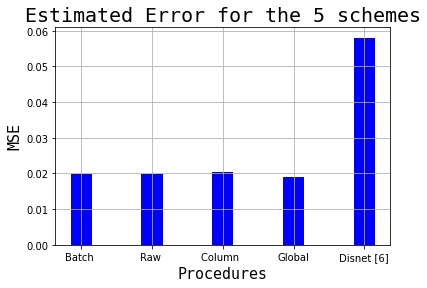

In [122]:
print(np.shape(np.array(i)))
import matplotlib.pyplot as plt
plt.bar(['Batch ','Raw ','Column  ','Global','Disnet [6]'],[errorbatch,errorraw,errorcolumn,errorglobal,errordisnet],0.3,color='blue')
plt.title('Estimated Error for the 5 schemes', fontsize=20,fontname='monospace')
plt.xlabel('Procedures',fontsize=15,fontname='monospace')
plt.ylabel('MSE',fontsize=15,fontname='monospace')
plt.grid()

# 20. upload Distnet model

In [20]:
uploaded = files.upload()

Saving model.h5 to model.h5


# 21. Load Distnet model

In [21]:
Distnet = load_model('/content/model.h5',compile=False)
windowsize_r = 224
windowsize_c = 224

# 22. Upload an image to quantify its quality, then write its path in img_path

In [22]:
uploaded = files.upload()

Saving 2017266.jpg to 2017266.jpg


In [23]:
img_path = '/content/2017266.jpg' 

# 23. Resize the image 

In [24]:
img1=Image.open(img_path)
img1=img = data_resize2(img1)

# 24. Use Distnet model to predict the error map

In [25]:
h,l,c = np.shape(img1)
img = np.transpose(img1,(2,0,1)) #channel first
a=np.zeros((c,(h//224)*224,(l//224)*224))
for i in range(0,h//224):
    for j in range(0,l//224):
        image = img[:,i*224:(i+1)*224,j*224:(j+1)*224]/255.0
        image = image.reshape((1,3,224,224))
        pred_img = Distnet.predict(image)
        pred_img = pred_img.squeeze()
        a[:,i*224:(i+1)*224,j*224:(j+1)*224] += pred_img
DistMap = np.transpose(a,(1,2,0))
DistMap = rgb2gray(DistMap)
skimage.io.imsave('/content/DistMap'+'.jpeg',DistMap)


# 25. Show the distortion map (without a reference)

(321, 321)


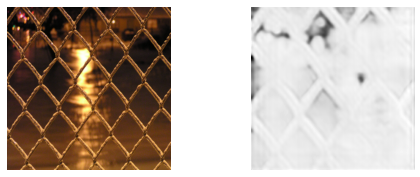

In [26]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.imshow(img1)
ax2.imshow(DistMap,cmap='gray')
DistMap=Image.open('/content/DistMap.jpeg')
DistMap=np.array(data_resize2(DistMap))
print(np.shape(DistMap))

# 26. Process the distortion map by considering the 4 mentioned methods

In [103]:
mean=dip.block_process(DistMap,np.mean,block_size=[8,8])
NR_batch=mean.reshape([1,1681])
mean=dip.block_process(DistMap,np.mean,block_size=[1,321])
NR_row=mean.reshape([1,321])
mean=dip.block_process(DistMap,np.mean,block_size=[321,1])
NR_column=mean.reshape([1,321])
mean=dip.block_process(DistMap,np.mean,block_size=[321,321])
NR_global=mean


# 27. Order the vectors

In [108]:
Batch_nr=np.fliplr(np.sort(NR_batch))
raw_nr=np.fliplr(np.sort(NR_row))
culumn_nr=np.fliplr(np.sort(NR_column))
golbal_nr=np.fliplr(np.sort(NR_global))

# 28. Print Estimated SSIM scores without reference Image

In [125]:
bat=ridgeregb.predict(Batch_nr.reshape(1,-1))
print(bat)
ro=ridgeregr.predict(raw_nr.reshape(1,-1))
print(ro)
co=ridgeregc.predict(culumn_nr.reshape(1,-1))
print(co)
go=ridgeregg.predict(golbal_nr.reshape(1,-1))
print(go)
mean=np.mean(DistMap)/255
var=np.std(DistMap)/255
disForumla= np.sum(mean*(var**2))
print(disForumla)

[[0.7553227]]
[[0.81428121]]
[[0.80215654]]
[[0.80392161]]
0.004688172103925193
